#Implementation of a convolutional neural network (CNN)

In this notebook I have implemented a small convolutional network to recognize handwritten digits using the MNIST dataset.

MNIST is a large database that contains images of handwritten numbers, useful for machine learning training applications. It contains 60,000 training images and 10,000 test images.

The neural network is composed of two levels of 8-matrix convolution, each followed by the activation function ReLU, a layer of dimensional reduction based on pooling and dropout with an additional two levels of 16-matrix convolution, followed by pooling and dropout.

The result is flattened and is provided at two levels of neural networks fully connected to 64 nodes, applying also here ReLu and dropout.

The output layer consists of a 10-node network and the Softmax non-linear activation function.

(Pooling is an operation that allows you to reduce complexity by considering only a part of the data. It is a dimensional reduction process that allows you to simplify the complexity of CNN.
The dropout randomly removes some of the connections between two nodes of the neural network at the variation of the training data

Both techniques are used to reduce overfitting during classification that occurs in the fully-connected neural network
)

The training data was split in order to dedicate 20% to the validation phase.
Two other parameters have also been introduced: Epochs and batch_size.
To fit the model, the entire training dataset is input more than once, with the aim of improving accuracy; every time we repeat this operation we talk about Epoch.
The batch size defines the number of training data processed before updating the parameters of our model; in this case 32 images are processed at a time before the CNN optimization can change any parameters.






The network is represented by the following figure

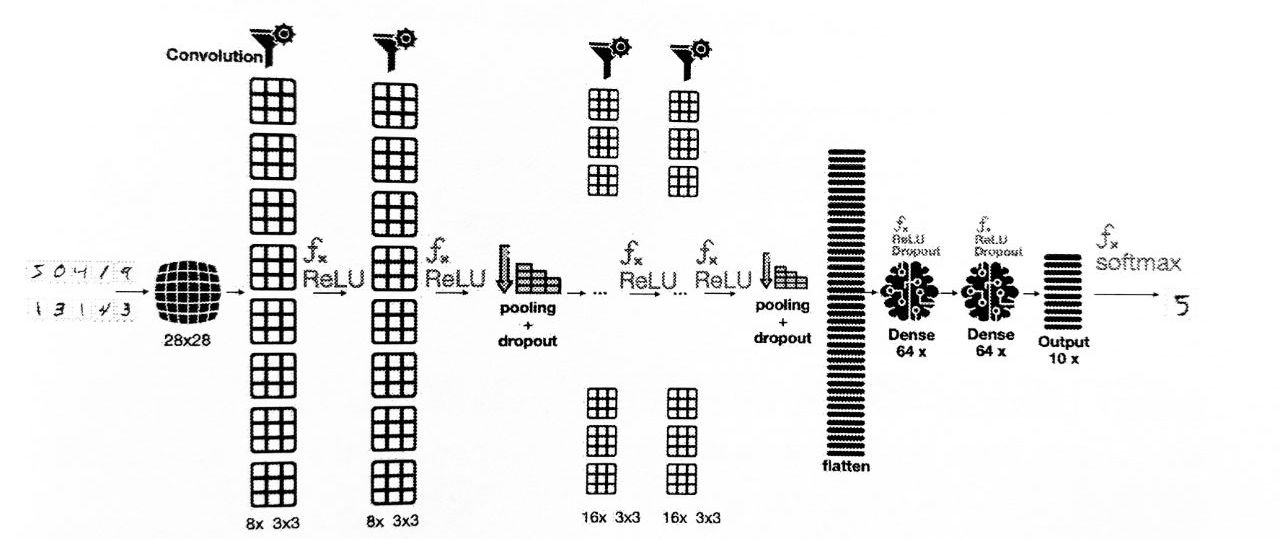

In [ ]:
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense, Flatten, Activation, Dropout
from keras.layers import Conv2D, MaxPooling2D

from matplotlib import pyplot as plt

mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test/255.0

x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

print(x_train.shape)
print(x_test.shape)

model = Sequential()

#1st convolution and pooling layer
model.add(Conv2D(8, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(8, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#2nd convolution and pooling layer
model.add(Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(16, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flattening
model.add(Flatten(input_shape=(28,28,1)))

#1st fully connected Neural Network hidden layer
model.add(Dense(64))
model.add(Dropout(0.5))
model.add(Activation('relu'))

#2nd fully connected Neural Network hidden layer
model.add(Dense(64))
model.add(Dropout(0.3))
model.add(Activation('relu'))

#Output layer
model.add(Dense(10))
model.add(Activation('softmax'))
model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


history = model.fit(
    x_train, 
    y_train,
    epochs=6,
    batch_size=32,
    validation_split =0.2,
    shuffle=True
)

model.evaluate(x_test, y_test, verbose=2)



11493376/11490434 [==============================] - 0s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 8)         80        
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 8)         584       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 8)         0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 16)        1168      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 16)          2320      
___________________

[0.04309376701712608, 0.9871000051498413]

By graphically displaying the results on the loss function and accuracy function we can see how the two functions improve with increasing epochs, thanks to the use of pooling and dropout to decrease overfitting.

(You can test and visualize, by removing all dropouts from the model, how overfitting would cause significant degradation from the third epoch onwards.)

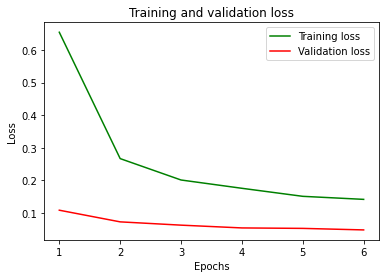

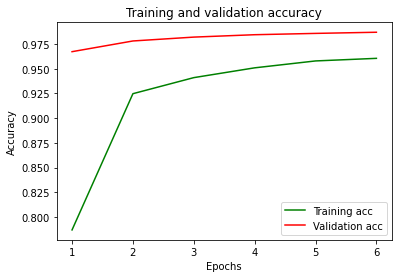

In [ ]:
#Print loss functions for Training and Validation
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(loss) + 1)

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

#Print accuracy functions for Training and Validation data
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'g', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()




We now carry out the prediction on a test image, in this case the number 2212, corresponding to the number 9.
In the Predicted probability array we can see the probabilities that the model generates for each index corresponding to a number from 0 to 9.

Predicted number: 9
Predicted probability array:
[[8.9759877e-10 6.6723793e-08 4.3365342e-09 3.8578210e-07 2.2196865e-03
  1.4375209e-07 2.3689455e-11 2.4650342e-05 5.0084793e-04 9.9725419e-01]]


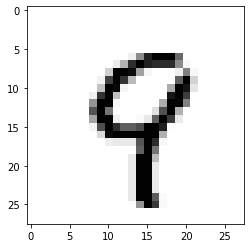

In [ ]:
#Image Prediction

#Print the image to predict
image_index = 2212
plt.imshow(x_test[image_index].reshape(28,28), cmap='Greys')

#Make the inference by using the fitted CNN model
pred = model.predict(x_test[image_index].reshape(-1,28,28,1))

print("Predicted number: %.0f"%pred.argmax())
print("Predicted probability array:")
print(pred)